In [16]:
#import keras

import keras
keras.__version__

'2.2.4'

In [17]:
#import data

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [18]:
len(train_labels)

8982

In [19]:
len(test_data)

2246

In [20]:
#format data and results
import numpy as np

def vectorize_sequence(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequences in enumerate(sequences):
        results[i,sequences]=1.
    return results
    
x_train= vectorize_sequence(train_data)
x_test= vectorize_sequence(test_data)
    

In [21]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)


In [22]:
#import keras settings

from keras import models
from keras import layers

#define model and layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [23]:
# compile

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [25]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 540us/step - loss: 1.8132 - acc: 0.6180 - val_loss: 1.2865 - val_acc: 0.7150
Epoch 2/20
7982/7982 [==============================] - 3s 315us/step - loss: 0.9889 - acc: 0.7804 - val_loss: 1.0935 - val_acc: 0.7610
Epoch 3/20
7982/7982 [==============================] - 3s 361us/step - loss: 0.6753 - acc: 0.8478 - val_loss: 1.0066 - val_acc: 0.7990
Epoch 4/20
7982/7982 [==============================] - 3s 316us/step - loss: 0.4591 - acc: 0.8990 - val_loss: 1.0047 - val_acc: 0.7910
Epoch 5/20
7982/7982 [==============================] - 3s 329us/step - loss: 0.3298 - acc: 0.9263 - val_loss: 0.9430 - val_acc: 0.8190
Epoch 6/20
7982/7982 [==============================] - 2s 301us/step - loss: 0.2501 - acc: 0.9435 - val_loss: 0.9731 - val_acc: 0.8190
Epoch 7/20
7982/7982 [==============================] - 2s 303us/step - loss: 0.2076 - acc: 0.9491 - val_loss: 1.0269 - val_acc: 0.8050


In [26]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 155us/step


[1.6870783587597569, 0.765805877141409]

In [27]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

<function matplotlib.pyplot.show(*args, **kw)>

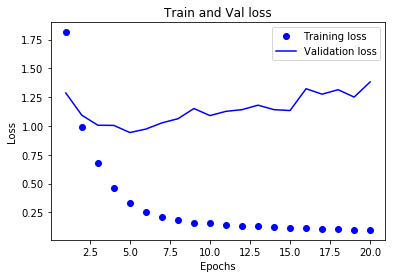

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Train and Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show



<function matplotlib.pyplot.show(*args, **kw)>

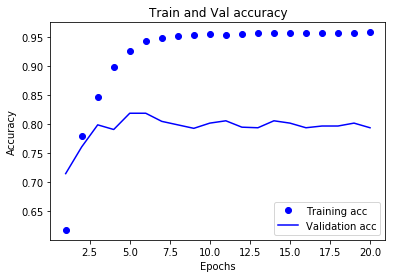

In [29]:
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Train and Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

In [30]:
predictions=model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
1.0000002
3
